In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint

In [3]:
qb_file= "Resources/raw.csv"
qb_stats_file = "Resources/static_data.csv"
all_qbs_file= "Resources/new_qb.csv"
qb_df=pd.read_csv(qb_stats_file)
qb_stats_df=pd.read_csv(qb_file)
all_qbs_df=pd.read_csv(all_qbs_file)

In [4]:
qb_stats_df

,Player,player_year,season_year,Tm,Age,G,GS,Wins,Losses,Yds,TD,Y/A,Y/G,Rate,Salary
0,A.J. Feeley,1,2001,PHI,24,1,0,0,0,143,2,10.2,143.0,114.0,319325
1,A.J. Feeley,2,2002,PHI,25,6,5,4,1,1011,6,6.6,168.5,75.4,389000
2,A.J. Feeley,3,2004,MIA,27,11,8,3,5,1893,11,5.3,172.1,61.7,3455000
3,A.J. Feeley,4,2006,PHI,29,2,0,0,0,342,3,9.0,171.0,122.9,1540000
4,A.J. Feeley,5,2007,PHI,30,3,2,0,2,681,5,6.6,227.0,61.2,190588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,Vince Young,5,2010,TEN,27,9,8,4,4,1255,10,8.0,139.4,98.6,7500000
674,Vince Young,6,2011,PHI,28,6,3,1,2,866,4,7.6,144.3,60.8,4000000
675,Vince Young,7,2012,BUF,29,0,0,0,0,0,0,0.0,0.0,0.0,350000
676,Zach Mettenberger,1,2014,TEN,23,7,6,0,6,1412,8,7.9,201.7,83.4,451279


In [5]:
qb_df

,Player,Rnd,Pick,DrAge,Tm,College/Univ
0,A.J. Feeley,5,155,24,PHI,Oregon
1,A.J. McCarron,5,164,23,CIN,Alabama
2,Aaron Rodgers,1,24,21,GNB,California
3,Alex Smith,1,1,21,SFO,Utah
4,Andrew Luck,1,1,22,IND,Stanford
...,...,...,...,...,...,...
83,Troy Smith,5,174,23,BAL,Ohio St.
84,Tyler Thigpen,7,217,23,MIN,Coastal Carolina
85,Tyrod Taylor,6,180,22,BAL,Virginia Tech
86,Vince Young,1,3,23,TEN,Texas


<BarContainer object of 7 artists>

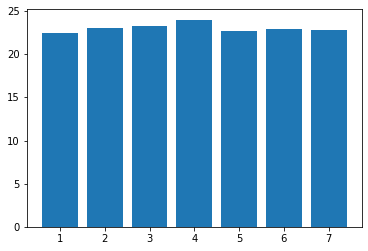

In [6]:
qb_round=qb_df.groupby(qb_df['Rnd']).mean()
qb_round.sort_values('DrAge',ascending=False)
Round=qb_round.index
Age=qb_round['DrAge']
plt.bar(Round,Age)

In [7]:
qb_round

,Pick,DrAge
Rnd,,
1,10.882353,22.500000
2,44.400000,23.000000
3,80.083333,23.250000
4,110.375000,24.000000
5,156.500000,22.750000
6,190.636364,22.909091
7,231.200000,22.800000


Text(0.5, 1.0, 'Career Length')

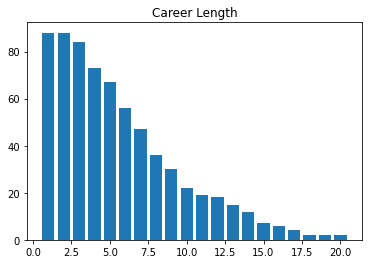

In [8]:
qb_best=qb_stats_df.groupby(qb_stats_df['player_year']).count()
x_values=qb_best.index
y_values=qb_best['Player']
plt.bar(x_values,y_values)
plt.title("Career Length")

In [9]:


# get % of where QBs drafted
# Determine # of QBs who never appeared in a game
# Determine # of QB who appeared in a game but not more than 8
# Get number of QBs who appeared in 9 or more games
# Get total draft picks in same 2000-2015 and divid by poistional quantity. 
#2 tackles, 2 guards, 2 RBs, 2 WRs, 2 DE, 2 LBs, 2 DT, 2 safeties, 2 corners

#all_qbs_df
#all_qbs_df.dtypes
#all_qbs_df['Player']=all_qbs_df['Player'].astype(object)

#qb_df.dtypes
#all_qbs_df.dtypes

In [10]:
# Get total number of QBs drafted from 2000 to 2015
all_qbs_df

,Year,Rnd,Pick,Player,Pos,DrAge,Tm,From,To,AP1,PB,St,wAV,G,GS,College/Univ,Unnamed: 16
0,2000,1,18,Chad Pennington,QB,24.0,NYJ,2000.0,2010.0,0,0,5,55.0,89.0,81.0,Marshall,College Stats
1,2000,3,65,Giovanni Carmazzi,QB,NaN,SFO,NaN,NaN,0,0,0,NaN,NaN,NaN,Hofstra,NaN
2,2000,3,75,Chris Redman,QB,23.0,BAL,2000.0,2011.0,0,0,0,9.0,31.0,12.0,Louisville,College Stats
3,2000,5,163,Tee Martin,QB,22.0,PIT,2001.0,2003.0,0,0,0,0.0,3.0,0.0,Tennessee,College Stats
4,2000,6,168,Marc Bulger,QB,23.0,NOR,2002.0,2009.0,0,2,8,57.0,96.0,95.0,West Virginia,College Stats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2015,3,75,Garrett Grayson,QB,24.0,NOR,2015.0,2015.0,0,0,0,0.0,1.0,0.0,Colorado St.,College Stats
194,2015,3,89,Sean Mannion,QB,23.0,STL,2015.0,2021.0,0,0,0,2.0,14.0,3.0,Oregon St.,College Stats
195,2015,4,103,Bryce Petty,QB,24.0,NYJ,2016.0,2017.0,0,0,0,4.0,10.0,7.0,Baylor,College Stats
196,2015,5,147,Brett Hundley,QB,22.0,GNB,2016.0,2019.0,0,0,1,5.0,18.0,9.0,UCLA,College Stats


In [61]:
#Graph the number drafted and group by round
all_qb_by_round=all_qbs_df.groupby(["Rnd"]).count()


Text(0, 0.5, 'Total QBs')

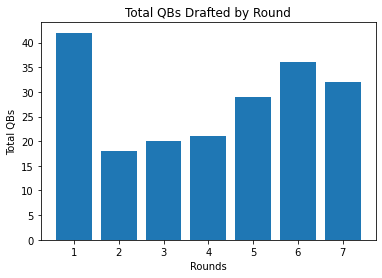

In [62]:
Round=all_qb_by_round.index
Total_per_round=all_qb_by_round['Year']
plt.bar(Round,Total_per_round)
plt.title('Total QBs Drafted by Round')
plt.xlabel('Rounds')
plt.ylabel('Total QBs')

Text(0, 0.5, 'Percentage of QBs')

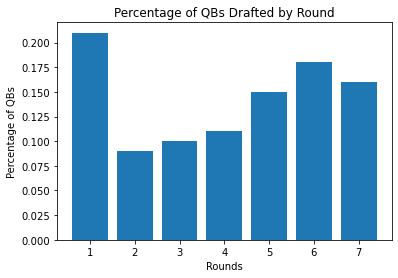

In [67]:
# get % of where QBs drafted
Round=all_qb_by_round.index
total_picks=all_qb_by_round['Year'].sum()
total_picks
Perc_by_round=round(all_qb_by_round['Year']/total_picks,2)
plt.bar(Round,Perc_by_round)
plt.title('Percentage of QBs Drafted by Round')
plt.xlabel('Rounds')
plt.ylabel('Percentage of QBs')


In [64]:
#Fill in all the NaN values with a 0
all_qb_df=all_qbs_df.fillna(0)
#Create DataFrame to get QBs who never played in a game
never_appeared=all_qb_df.loc[all_qb_df['G']==0,:]

Text(0.5, 0, 'Rounds')

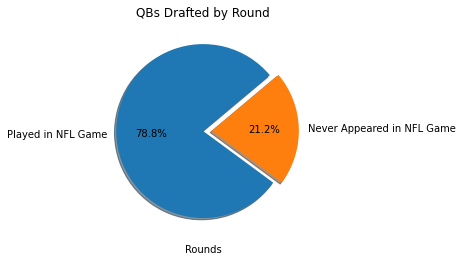

In [65]:
#Pie plot the QBs appeared vs never appeared percentage
Round=all_qb_by_round.index
total_picks=len(all_qb_df.index)
never=len(never_appeared.index)
played=total_picks-never
sizes=[played,never]
labels=['Played in NFL Game','Never Appeared in NFL Game']
explode = (0, 0.1,) 
plt.pie(sizes, labels=labels,explode=explode,shadow=True,autopct='%1.1f%%',startangle=40)
plt.title('QBs Drafted by Round')
plt.xlabel('Rounds')


Text(0, 0.5, 'Total QBs')

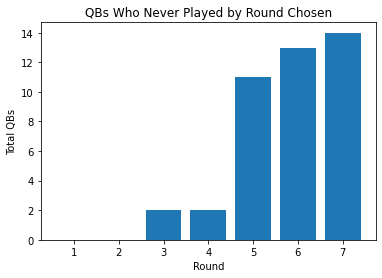

In [58]:
no_games=never_appeared.groupby(['Rnd']).count()
round2=[1,2,3,4,5,6,7]
no_play_year=no_games['Year']
no_play_year=no_play_year.tolist()
no_play_year.insert(0,0)
no_play_year.insert(0,0)
plt.bar(round2,no_play_year)
plt.title('QBs Who Never Played by Round Chosen')
plt.xlabel('Round')
plt.ylabel('Total QBs')